<a href="https://colab.research.google.com/github/Gayathiri-E/CODECASA/blob/main/ML_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT NECESSARY DATASET

In [1]:
import pandas as pd
import numpy as np

data_train = pd.read_csv('/content/NFLX.csv')
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


HANDLING MISSING VALUES

In [2]:
print(data_train.isnull().sum())
open_mean = data_train["Open"].astype("float").mean(axis=0)
data_train["Open"].replace(np.nan, open_mean, inplace=True)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


SVM MODEL TRAINING

In [3]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Date' is a non-numeric column, exclude it from the features
X = data_train.drop(['Close', 'Date'], axis='columns')
y = data_train['Close']




SPLIT DATA INTO TRAINING AND TESTING SETS

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Standardize the numeric features
numeric_columns = X_train.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [5]:

X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])



TRAIN SVM MODEL

In [6]:

svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)


SVR(kernel='linear')

In [7]:
from sklearn.metrics import mean_squared_error
# Make predictions on the test set
predictions = svm_model.predict(X_test_scaled)




EVALUATE THE MODEL

In [8]:

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.349854576648416


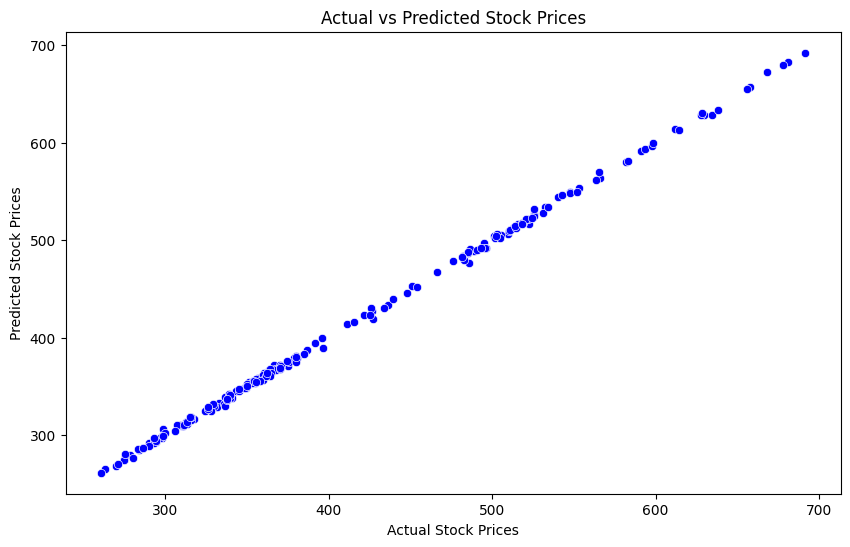

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
predictions = svm_model.predict(X_test_scaled)

# Create a DataFrame for easier plotting
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions}, index=y_test.index)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, color='blue')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Actual Stock Prices')
plt.ylabel('Predicted Stock Prices')
plt.show()



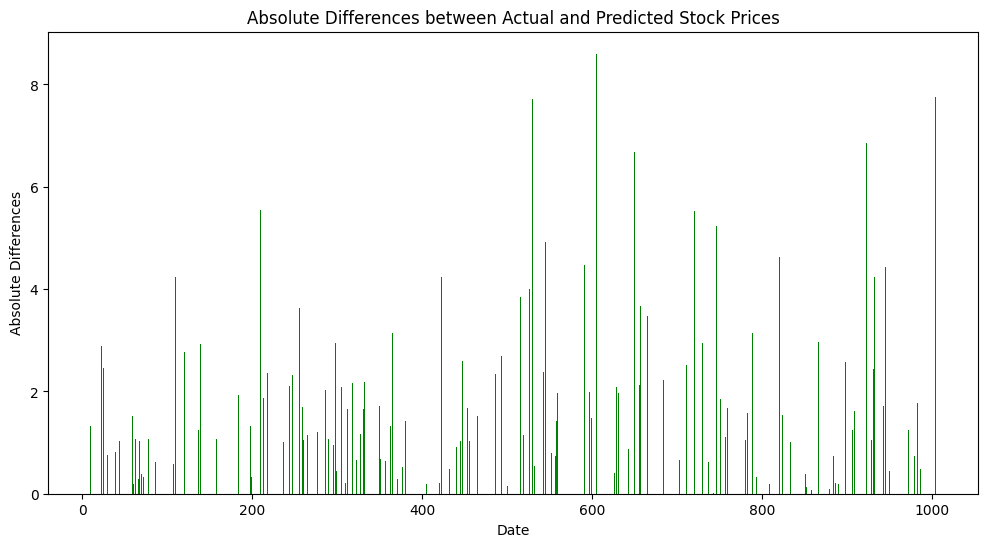

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = svm_model.predict(X_test_scaled)

# Calculate the absolute differences between actual and predicted prices
differences = np.abs(y_test.values - predictions)

# Plotting the absolute differences as a bar graph
plt.figure(figsize=(12, 6))
plt.bar(y_test.index, differences, color='green')
plt.title('Absolute Differences between Actual and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Absolute Differences')
plt.show()
